<a href="https://colab.research.google.com/github/rabihchamas/Gaussian-mixture-models-multi-organ-segmentation/blob/main/ImagePP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydicom
import pydicom as dicom
import matplotlib.pylab as plt
from google.colab import drive
from skimage import filters
drive.mount('/content/drive')
import numpy as np
import math
from skimage.morphology import erosion, dilation, opening, closing, disk, rectangle



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


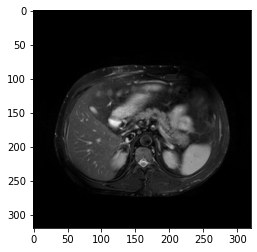

In [ ]:
# specify your image path
#/content/drive/MyDrive/Train_Sets/MR/2/T2SPIR/DICOM_anon/IMG-0007-00014.dcm
#/content/drive/MyDrive/Train_Sets/MR/8/T2SPIR/DICOM_anon/IMG-0031-00018.dcm
#/content/drive/MyDrive/Train_Sets/MR/19/T2SPIR/DICOM_anon/IMG-0024-00017.dcm
##/content/drive/MyDrive/Train_Sets/MR/33/T2SPIR/DICOM_anon/IMG-0034-00013.dcm
##/content/drive/MyDrive/Train_Sets/MR/39/T2SPIR/DICOM_anon/IMG-0026-00014.dcm
image_path = '/content/drive/MyDrive/Train_Sets/MR/2/T2SPIR/DICOM_anon/IMG-0007-00014.dcm'
ds = dicom.dcmread(image_path)
#np.array(ds)
img = ds.pixel_array
#/content/drive/MyDrive/Train_Sets/MR/2/T2SPIR/Ground/IMG-0007-00014.png
seg_img_path = '/content/drive/MyDrive/Train_Sets/MR/2/T2SPIR/Ground/IMG-0007-00014.png'
seg_img = io.imread(seg_img_path)
plt.imshow(img, cmap='gray')

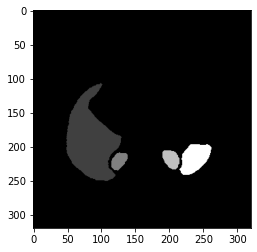

In [ ]:
plt.imshow(seg_img, cmap='gray')

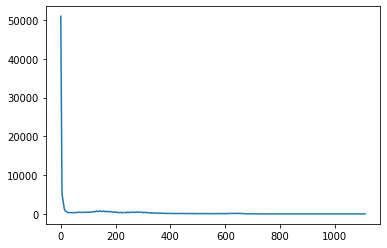

In [ ]:

histogram, bins = np.histogram(img, bins=256 )

plt.plot(bins[0:-1], histogram)
plt.show()

In [ ]:

from sklearn.mixture import GaussianMixture

# defining a method that apply gaussian classification on histogram on the image 
def gaussian_his(imgA,gaussian_num) :
  data = imgA.copy()
  #data = data.ravel()
  data = data[data >150]
  X=np.expand_dims(data,1)
  gm = GaussianMixture(n_components=gaussian_num, random_state=0).fit(X)
  return gm
gmh = gaussian_his(img,4)
gmh.means_ 


array([[178.72546329],
       [408.50370007],
       [587.93009517],
       [276.29896883]])

In [ ]:

def class_img(gmm,img,class_num):
  data = img.copy()
  n = data.shape[0]
  m = data.shape[1]
  data = data.ravel()
  X=np.expand_dims(data,1)
  gmh.predict([X[0]])
  for i in range(len(X)):
    if (gmh.predict([X[i]]) != [[class_num]] or X[i][0] < 150):
      X[i] = [0] 
  Y=X.reshape(n,m)
  return Y  


In [ ]:

img_0 = class_img(gmh,img,0)
img_1 = class_img(gmh,img,1)
img_2 = class_img(gmh,img,2)
img_3 = class_img(gmh,img,3)



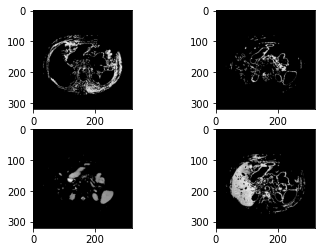

In [ ]:
plt.subplot(221)
plt.imshow(img_0, cmap='gray')

plt.subplot(222)
plt.imshow(img_1, cmap='gray')

plt.subplot(223)
plt.imshow(img_2, cmap='gray')

plt.subplot(224)
plt.imshow(img_3, cmap='gray')

In [ ]:
A_im = [img_0,img_1,img_2,img_3]

In [ ]:
#get_img_mean(img_2)

In [ ]:

# method that return the mean of an image after removing the pixels of intensity less than 150
def get_img_mean(imgM):
  data = imgM.copy()
  data = data.ravel()
  data = data[data >150]
  return data.mean()  

In [ ]:
img_liver = np.zeros_like(img_1)
#print(get_img_mean(img_7))
for im in A_im:
  if (get_img_mean(im)>546 and get_img_mean(im) <1100):  #1150
    img_ks = im
  elif (get_img_mean(im)>260 and get_img_mean(im)<440 ):
    img_liver = im
     
#print(get_img_mean(img_2))


In [ ]:
#plt.imshow(img_liver,cmap='gray')

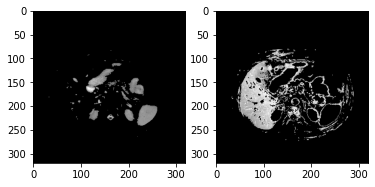

In [ ]:
plt.subplot(121)
plt.imshow(img_ks, cmap='gray')

plt.subplot(122)
plt.imshow(img_liver, cmap='gray')

# plt.subplot(223)
# plt.imshow(img_2, cmap='gray')

# plt.subplot(224)
# plt.imshow(img_3, cmap='gray')

In [ ]:
#msk_0 = np.logical_and(img_liver > get_img_mean(img_liver) - 30 , img_liver < get_img_mean(img_liver) + 60)

#plt.imshow(msk_0, cmap='gray')

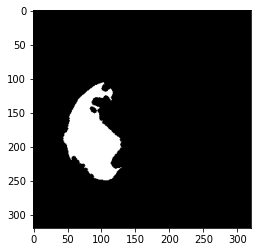

In [ ]:

# working with the liver image 
### if img_liver 
if (img_liver.any() != 0): 
  blur_img = filters.gaussian(img_liver,  0.4)


  msk_0 = img_liver > get_img_mean(img_liver) - 30  
  msk = img_liver > 0


  msk = opening(msk,rectangle(2,10))
  msk = opening(msk,rectangle(10,2))
  msk = erosion(msk,rectangle(12,3))     
  for i in range(10):
    msk = dilation(msk,disk(2))
    msk = np.minimum(msk,msk_0)
  for i in range(5):
    msk = closing(msk,disk(3)) 


  plt.imshow(msk,cmap='gray') 

In [ ]:
# from skimage import io
# image_path = '/content/drive/MyDrive/Train_Sets/MR/2/T2SPIR/DICOM_anon/IMG-0007-00014.dcm'
# ds1 = dicom.dcmread(image_path)

# #plt.imshow(ds.pixel_array, cmap='gray')

# img = io.imread('/content/drive/MyDrive/Train_Sets/MR/2/T2SPIR/Ground/IMG-0007-00014.png')


# plt.subplot(121)
# plt.imshow(img, cmap='gray')


# plt.subplot(122)
# plt.imshow(ds1.pixel_array, cmap='gray')

In [ ]:
mask_ks = img_ks >0


In [ ]:
# defining the gaussian binary function which apply gmm on binary image wrt position and return the gaussain object and the array
def gaussian_binary(img,m) :
  A = []
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] == True:
        A.append([i,j])
  gmb = GaussianMixture(n_components=m, random_state=0).fit(A)
  return gmb

In [ ]:
# defining a function that give false values for all pixels outside some class and return the image
def get_class (gm,img2,class_num):
  #print(gm.means_) 
  img1 = img2.copy()
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      if (gm.predict([[i,j]]) != [class_num] ):
       img1[i,j] = False
  return img1
if img_liver.any() ==0:
  plt.imshow(img_liver)
  gm = gaussian_binary(mask_ks,4)
else:
  gm =  gaussian_binary(mask_ks,6) 
gm.means_

array([[218.23072765, 237.09438618],
       [164.18933412, 210.78448429],
       [160.81762133, 137.35079954],
       [143.15084897, 140.41188481],
       [219.6646706 , 134.66624112],
       [215.99807037, 200.63876422]])

In [ ]:
if len(gm.means_) == 6:
  img_ks_4 = get_class(gm,mask_ks,4)
  img_ks_5 = get_class(gm,mask_ks,5)

img_ks_0 = get_class(gm,mask_ks,0)
img_ks_1 = get_class(gm,mask_ks,1)
img_ks_2 = get_class(gm,mask_ks,2)
img_ks_3 = get_class(gm,mask_ks,3)

#img_ks_6 = get_class(gm,img_ks,6)



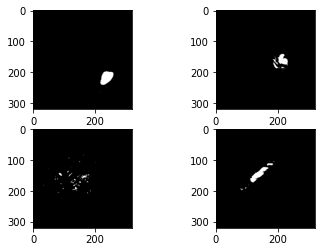

In [ ]:
plt.subplot(221)
plt.imshow(img_ks_0, cmap='gray')

plt.subplot(222)
plt.imshow(img_ks_1, cmap='gray')
plt.subplot(223)
plt.imshow(img_ks_2, cmap='gray')
plt.subplot(224)
plt.imshow(img_ks_3, cmap='gray')


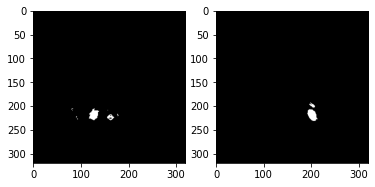

In [ ]:
if len(gm.means_) == 6:
  plt.subplot(121)
  plt.imshow(img_ks_4, cmap='gray')
  plt.subplot(122)
  plt.imshow(img_ks_5, cmap='gray')

In [ ]:
def get_position_mean(imgM):
  A = []
  for i in range(imgM.shape[0]):
    for j in range(imgM.shape[1]):
      if imgM[i][j] == True:
        A.append((i,j))
  return np.mean(A,axis=0)      

In [ ]:
get_position_mean(img_ks_5)

array([216.19410319, 200.83538084])

In [ ]:
# B = [img_ks_0,img_ks_1,img_ks_2,img_ks_3,img_ks_4,img_ks_5]
# img_spleen = np.zeros_like(img_1)
# img_lk = np.zeros_like(img_1)
# img_rk = np.zeros_like(img_1)
# for im in B :
#   if (200< get_position_mean(im)[0] and get_position_mean(im)[0]< 240 and get_position_mean(im)[1]>217 and get_position_mean(im)[1]<257):
#     img_spleen = im
#   elif(200< get_position_mean(im)[0] and get_position_mean(im)[0]< 240 and get_position_mean(im)[1]>114 and get_position_mean(im)[1]<154):
#     img_lk = im
#   elif (195< get_position_mean(im)[0] and get_position_mean(im)[0]< 235 and get_position_mean(im)[1]>170 and get_position_mean(im)[1]<216):    
#     img_rk = im
B = [img_ks_0,img_ks_1,img_ks_2,img_ks_3,img_ks_4,img_ks_5]
img_spleen = np.zeros_like(img_1)
img_lk = np.zeros_like(img_1)
img_rk = np.zeros_like(img_1)
for im in B :
  if (130< get_position_mean(im)[0] and get_position_mean(im)[0]< 240 and get_position_mean(im)[1]>215 and get_position_mean(im)[1]<257):
    img_spleen = im
  elif(140< get_position_mean(im)[0] and get_position_mean(im)[0]< 240 and get_position_mean(im)[1]>90 and get_position_mean(im)[1]<154):
    img_lk = im
  elif (140< get_position_mean(im)[0] and get_position_mean(im)[0]< 235 and get_position_mean(im)[1]>160 and get_position_mean(im)[1]<216):    
    img_rk = im

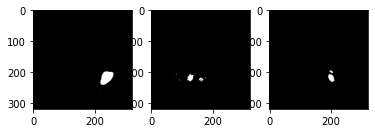

In [ ]:
plt.subplot(131)
plt.imshow(img_spleen, cmap='gray')

plt.subplot(132)
plt.imshow(img_lk, cmap='gray')

plt.subplot(133)
plt.imshow(img_rk, cmap='gray')

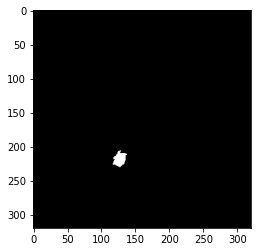

In [ ]:

msk_lk = erosion(img_lk,disk(2))
msk_lk = erosion(msk_lk,disk(2))
for i in range(5):
  msk_lk = dilation(msk_lk,disk(2))
  msk_lk = np.minimum(msk_lk,mask_ks)
plt.imshow(msk_lk, cmap='gray')

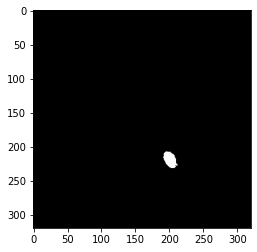

In [ ]:

msk_rk = erosion(img_rk,disk(2))
msk_rk = erosion(msk_rk,disk(2))
for i in range(5):
  msk_rk = dilation(msk_rk,disk(2))
  msk_rk = np.minimum(msk_rk,mask_ks)
plt.imshow(msk_rk,cmap='gray')

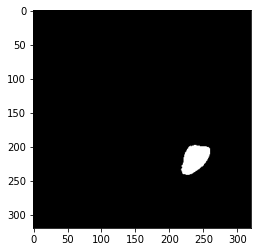

In [ ]:

msk_spleen = erosion(img_spleen,disk(2))
msk_spleen = erosion(msk_spleen,disk(2))
for i in range(5):
  msk_spleen = dilation(msk_spleen,disk(2))
  msk_spleen = np.minimum(msk_spleen,mask_ks)
plt.imshow(msk_spleen, cmap='gray')

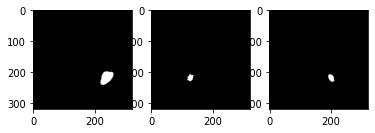

In [ ]:
plt.subplot(131)
plt.imshow(msk_spleen, cmap='gray')

plt.subplot(132)
plt.imshow(msk_lk, cmap='gray')

plt.subplot(133)
plt.imshow(msk_rk, cmap='gray')

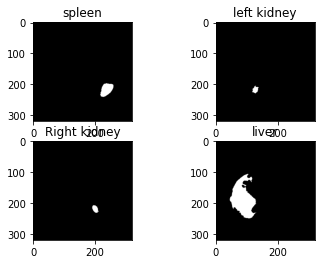

In [ ]:
plt.subplot(221)
plt.title('spleen')
plt.imshow(msk_spleen,cmap='gray')

plt.subplot(222)
plt.title('left kidney')
plt.imshow(msk_lk, cmap='gray')

plt.subplot(223)
plt.title('Right kidney')
plt.imshow(msk_rk,cmap='gray')

plt.subplot(224)
plt.title('liver')
plt.imshow(msk,cmap='gray')

Text(0.5, 1.0, 'all')

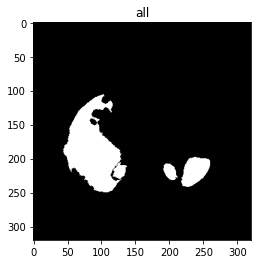

In [ ]:
mask_kid = np.logical_or(msk_lk , msk_rk)
mask_l_s = np.logical_or(msk , msk_spleen)
mask_final = np.logical_or(mask_l_s , mask_kid)
plt.imshow(mask_final,cmap='gray')
plt.title('all')

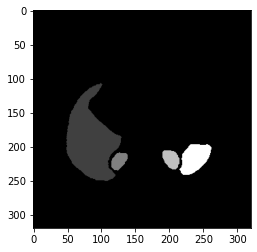

In [ ]:
plt.imshow(seg_img, cmap='gray')